In [1]:
import random
import math
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [2]:
# Load dataset into 2D list "Data"
# Assuming Data is a list of 2D points
data_path = 'offline_5_data.csv'
data = genfromtxt(data_path, delimiter=',')
data = data.tolist()

In [3]:
def k_means_clustering(Data, K):
    # Randomly select K different data points from "Data" and store them into 2D list "Centers"
    Centers = random.sample(Data, K)
    
    # Initialize a 2D list named "Clusters" which contains K 1D lists for the K centers
    Clusters = [[] for i in range(K)]

    len(Clusters)


    # for each sample/ data point "S" in "Data":
    # identify the center “C_i” that is the closest to “S”
    # Append "S" in "i"th list of "Clusters"
    for S in Data:
        minDist = math.inf
        minIdx = -1
        for i in range(K):
            dist = math.dist(S, Centers[i])
            if dist < minDist:
                minDist = dist
                minIdx = i
        Clusters[minIdx].append(S)
        
    itr = 1
    Shift = 0
    while True:
        for i in range(K):
            # Determine the average of the data points. This is the new center of this list.
            if Clusters[i]:
                Centers[i] = [sum(x)/len(Clusters[i]) for x in zip(*Clusters[i])]
    
        if itr > 1 and Shift < 10:
            break # convergence
    
        Shift = 0
        Temp_Clusters = [[] for i in range(K)]
        for S in Data:
            minDist = math.inf
            minIdx = -1
            for i in range(K):
                dist = math.dist(S, Centers[i])
                if dist < minDist:
                    minDist = dist
                    minIdx = i
            Temp_Clusters[minIdx].append(S)
    
            # if S belongs to different clusters in "Clusters" and "Temp_Clusters" then "Shift" = "Shift" + 1
            if minIdx != [j for j in range(K) if S in Clusters[j]][0]:
                Shift += 1
    
        # Assign "Temp_Clusters" to "Clusters"
        Clusters = Temp_Clusters
        itr += 1
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i in range(K):
        x = [p[0] for p in Clusters[i]]
        y = [p[1] for p in Clusters[i]]
        plt.scatter(x, y, c=colors[i%7])
        
    for center_idx, center in enumerate(Centers):
        plt.scatter(center[0], center[1], c='k', marker='X', s=100)

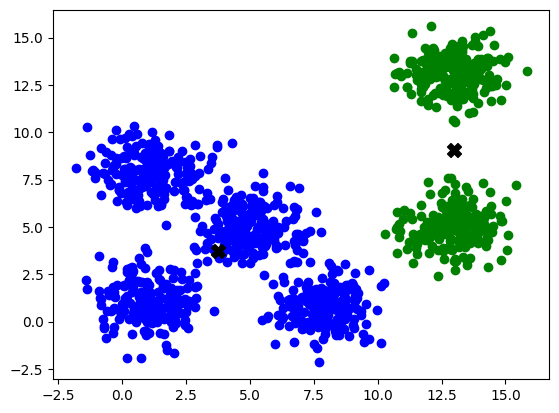

In [4]:
k_means_clustering(data, 2)

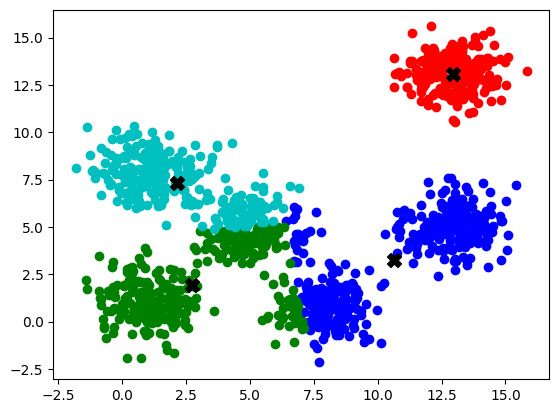

In [5]:
k_means_clustering(data, 4)

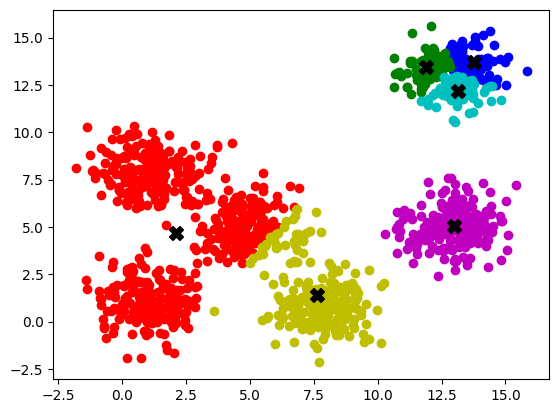

In [6]:
k_means_clustering(data, 6)

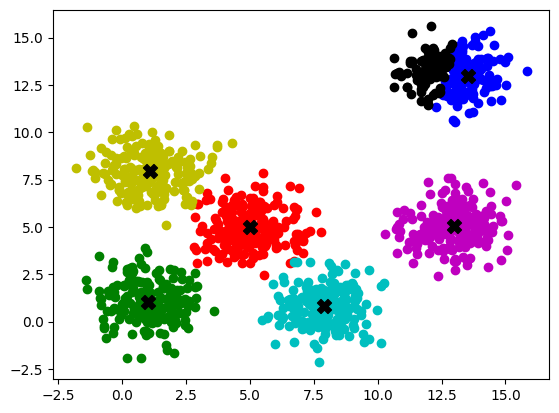

In [7]:
k_means_clustering(data, 7)

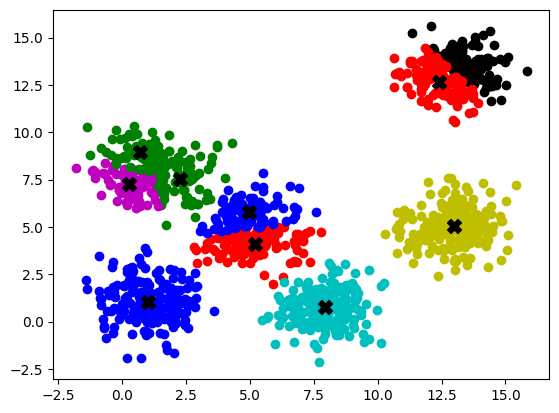

In [8]:
k_means_clustering(data, 10)